# Geospatial Visualization
#### Author: Naomi Moraes
#### Link: https://github.com/nmoraescommit/eds220-hw4/tree/main

## About
- Purpose: The purpose of this notebook is to explore, clean, and analyze the Landsat data, and observe comparativities with the Thomas Fire perimeter data created in "hwk4-task2-fire-perimeter-MORAES". 
- Highlights: Working with this dataset was interesting in working with satellite data surface reflectance and surface temperature data, being able to start understanding/scratching at the surface of independantly working with xarray dataset dat, and workiing with the different variables within this dataset to plot out maps. An important part of this coding process was making sure the crs of various geospatial data matched as well as being able to select variables for the dataset to plot out different kinds of maps.
- About the data: The data was retrieved from the Microsof Planetary Computer data catalogue and pre-processed to remove data outside land and coarsen the spatial resolution. It is imported as a simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, collected by the Landsat 8 satellite.
- References: 
    - Thomas Fire Perimeter: Publisher CAL FIRE. (2024, May 14). State of California - california fire perimeters (all). Catalog. https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436 
    - Assignment Reference and Cleaned Landsat Data Access : Galaz-Garcia, C. (n.d.). Assignment 4. assignment4 – EDS 220 - Working with Environmental Datasets. https://meds-eds-220.github.io/MEDS-eds-220-course/assignments/assignment4.html 
    - Landsat Data: Microsoft Planetary Computer. Planetary Computer. (n.d.). https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2 

## Set-Up

### Import Libraries

In [33]:
# Import relevant libraries
import os
import geopandas as gpd
import rioxarray as rioxr
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

### Import Data

In [2]:
# Set up file paths
land_fp = os.path.join('data', 'landsat8-2018-01-26-sb-simplified.nc')
thomas_fp = os.path.join('data', 'thomas_fire_boundary.geojson')

# Import landsat data
landsat = rioxr.open_rasterio(land_fp)

# Import Thomas Fire perimeter
thomas_fire_perimeter = gpd.read_file(thomas_fp)

## Explore Data

In [3]:
landsat

<xarray.Dataset>
Dimensions:      (y: 731, x: 870, band: 1)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    red          (band, y, x) float64 ...
    green        (band, y, x) float64 ...
    blue         (band, y, x) float64 ...
    nir08        (band, y, x) float64 ...
    swir22       (band, y, x) float64 ...

In [4]:
landsat.to_array().shape

(5, 1, 731, 870)

In [5]:
landsat.sizes

Frozen({'y': 731, 'x': 870, 'band': 1})

In [6]:
landsat.coords

Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0

In [7]:
landsat.dims

Frozen({'y': 731, 'x': 870, 'band': 1})

In [8]:
landsat.variables

Frozen({'y': <xarray.IndexVariable 'y' (y: 731)>
array([3952395., 3952125., 3951855., ..., 3755835., 3755565., 3755295.])
Attributes:
    axis:           Y
    crs:            EPSG:32611
    long_name:      y coordinate of projection
    resolution:     -30
    standard_name:  projection_y_coordinate
    units:          metre
    _FillValue:     nan, 'x': <xarray.IndexVariable 'x' (x: 870)>
array([121305., 121575., 121845., ..., 355395., 355665., 355935.])
Attributes:
    axis:           X
    crs:            EPSG:32611
    long_name:      x coordinate of projection
    resolution:     30
    standard_name:  projection_x_coordinate
    units:          metre
    _FillValue:     nan, 'band': <xarray.IndexVariable 'band' (band: 1)>
array([1]), 'spatial_ref': <xarray.Variable ()>
array(0)
Attributes:
    crs_wkt:                           PROJCS["WGS 84 / UTM zone 11N",GEOGCS[...
    semi_major_axis:                   6378137.0
    semi_minor_axis:                   6356752.314245179
    i

In [9]:
landsat.rio.crs

CRS.from_epsg(32611)

### Data Exploration Analysis

Through the exploration of the "landsat" xarray.Dataset I have been able to notice the shape (5, 1, 731, 870) and the dimensions are x, y coordinates and 1 band. The data's variables has 5 information groups - red, green, blue, near infrared 08, and short wave infrared 22. The crs of the dataset is ESPG: 32611.

## Clean Data

In [10]:
# Drop the band dimension of the data
landsat = landsat.squeeze()

In [11]:
# Remove coordinates associated to band dimension
landsat = landsat.drop_vars('band')

In [12]:
# Check new landsat dataset
print(landsat.dims, landsat.coords)

Frozen({'y': 731, 'x': 870}) Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
    spatial_ref  int64 0


In [13]:
landsat.rio.crs

CRS.from_epsg(32611)

## Visualize Data

### True Color Image

Axes are labeled correctly, titles and legends are informative. The graph style enhances the data’s message.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0, 0.5, 'Y-Coordinates')

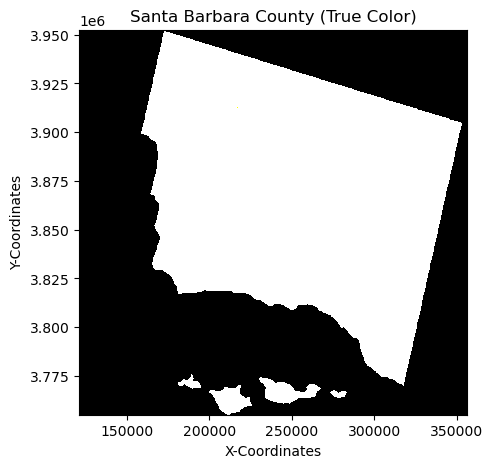

In [37]:
# Select the red, green, and blue variables (in that order) of the xarray.Dataset to create and RGB image

fig, ax = plt.subplots(figsize = (5, 5))

(landsat[['red', 'green', 'blue']]).to_array().plot.imshow()

ax.set_title("Santa Barbara County (True Color)")  # Add title

# Remove axes labels
ax.set_xlabel("X-Coordinates")  
ax.set_ylabel("Y-Coordinates") 

Text(0, 0.5, 'Y-Coordinates')

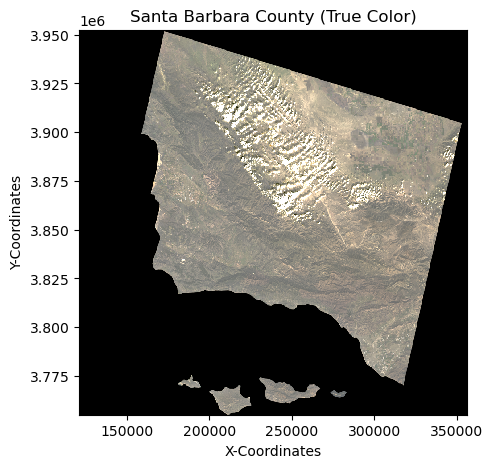

In [36]:
# Adjust the scale for plotting the bands for a true color image
fig, ax = plt.subplots(figsize = (5, 5))

(landsat[['red', 'green', 'blue']]).to_array().plot.imshow(robust = True)

ax.set_title("Santa Barbara County (True Color)")  # Add title

# Remove axes labels
ax.set_xlabel("X-Coordinates")  
ax.set_ylabel("Y-Coordinates")

The outputs for part d) and e) are visually similiar in shape but different in colour representation. This is because clouds cause the RGB values (outliers) cause the other RGB values to be impacted - such that we arrive at a functionally black and white map in part d and a true colour map in part e.

### False Color Image

Text(0, 0.5, 'Y-Coordinates')

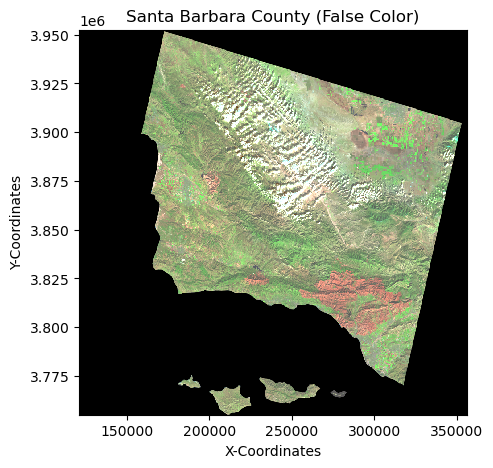

In [35]:
# Plot false color image
fig, ax = plt.subplots(figsize = (5, 5))

(landsat[['swir22', 'nir08', 'red']]).to_array().plot.imshow(robust = True)

ax.set_title("Santa Barbara County (False Color)")  # Add title

# Remove axes labels
ax.set_xlabel("X-Coordinates")  
ax.set_ylabel("Y-Coordinates") 

### Map

In [17]:
# Set CRS of landsat and thomas_fire_perimeter equivalent
thomas_fire_perimeter = thomas_fire_perimeter.to_crs(crs = landsat.rio.crs)

# Test if equivalencies true
assert thomas_fire_perimeter.crs == landsat.rio.crs

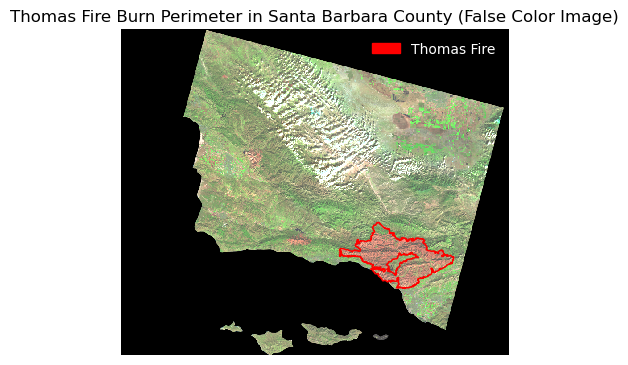

In [34]:
# Create map of false color map with Thomas Fire perimeter
fig, ax = plt.subplots(figsize = (5, 5))

landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust = True)

thomas_fire_perimeter.boundary.plot(ax = ax, edgecolor = 'red', linewidth = 1, label="Thomas Fire Boundary")

# Add title
ax.set_title("Thomas Fire Burn Perimeter in Santa Barbara County (False Color Image)")  

# Update labels & legend using mpatches.Patch
thomas_fire_border_patch = mpatches.Patch(color='red', label='Thomas Fire')

# Set legend within map borders
ax.legend(handles = [thomas_fire_border_patch], frameon=False, loc = "upper right", labelcolor = "white")


# removing axes
ax.axis('off')

plt.show()